In [1]:
#Multi Drift line Diffusion analysis

In [2]:

#INITIALIZION
#Kernel PyROOT
import os
#os.sys.path.append('/usr/common/software/rootpy')
#os.sys.path.insert(0,'/usr/common/software/uproot')
#import root_numpy
#import root_numpy as root_np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('GTK3Agg')
import ROOT
import pandas as pd
from scipy.optimize import curve_fit

import sys
from matplotlib.colors import LogNorm
import pylab

import glob
import uproot

import scipy
from scipy.optimize import curve_fit

%pylab inline
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

print("Starting notebook....")


#Function to turn file into arrays
def Get_drift_line_arrays(filename):
    file = open(filename, 'r')
    lines = file.readlines()

    #print len(lines)
    #print lines[2]

    rIN_cm = float(lines[10].split('\t\t')[0])
    zIN_cm = float(lines[10].split('\t\t')[1])

    DriftTime_us_list = []
    r_cm_list = []
    z_cm_list = []

    DriftTime_us_list.append(0.0)
    r_cm_list.append(rIN_cm)
    z_cm_list.append(zIN_cm)

    for i in range(0,len(lines)):
        if lines[i].startswith('#'):
            continue
        elif lines[i].startswith('*'):
            print lines[i]
        elif lines[i].startswith('0') or lines[i].startswith('1') or lines[i].startswith('2')\
        or lines[i].startswith('3') or lines[i].startswith('4') or lines[i].startswith('5')\
        or lines[i].startswith('6') or lines[i].startswith('7') or lines[i].startswith('8')\
        or lines[i].startswith('9'):
            a = lines[i].split('\t\t')
            #print a
            DriftTime_us_list.append(float(a[2]))
            r_cm_list.append(float(a[3]))
            z_cm_list.append(float(a[4]))
        else:
            continue
    return np.asarray(r_cm_list), np.asarray(z_cm_list), np.asarray(DriftTime_us_list)



def Get_file_length(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    return len(lines)


def Get_i_line_from_file(filename, i):
    file = open(filename, 'r')
    lines = file.readlines()
    a = lines[i].split('\t\t')
    DriftTime_us= float(a[2])
    r_cm = float(a[3])
    z_cm = float(a[4])
    return r_cm, z_cm, DriftTime_us


print "\n\t...Done!"

Welcome to JupyROOT 6.16/00
Populating the interactive namespace from numpy and matplotlib
Starting notebook....

	...Done!


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#Get all txt files in directory
pop=-2
def Get_arrays(r):
    file_list=[]
    for file in os.listdir("/data/rossiter/lz/EDM_DiffusionAnalysis_2005/r"+str(r)+"/"):
        if file.endswith(".txt"):
            #print(os.path.join(file))
            file_list.append("/data/rossiter/lz/EDM_DiffusionAnalysis_2005/r"+str(r)+"/"+os.path.join(file))

    if r==0:
        filename = "SingleDriftLineCalc_.5cm_r00cm_z02.0cm_0504.txt"
    else:
        filename="SingleDriftLineCalc_.5cm_r"+str(r)+"cm_z02.0cm_0504.txt"
    #Plot all drift lines
    figure(1)
    for i in range(0, len(file_list)):
        r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[i])
        #print file_list[i]
        #print Diff_z_cm_array[-1]
        
        if file_list[i].startswith('SingleDriftLineCalc'):
            plt.plot(r_cm_array[:pop], z_cm_array[:pop], '-k', linewidth=3, label='Drift line')
        else:
            plt.plot(r_cm_array, z_cm_array, '-', label='Diffusion line')
    
    r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(filename)
    plt.plot(r_cm_array[:pop], z_cm_array[:pop], '-k', linewidth=3, label='Drift line')

    plt.xlabel('R [cm]',fontsize=18,family='serif')
    plt.ylabel('Z [cm]',fontsize=18,family='serif')

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #pylab.legend(loc='best', fontsize=12)

    plt.ylim(0, 146.1)
    plt.xlim(r-1,r+1)

    print len(file_list)


    ###histgram of final r positions
    r_list = []
    z_list = []
    t_list = []
    j=-1
    #print j
    for f in file_list[:-1]:
        r,z,t= Get_i_line_from_file(f,j)
        r_list.append(r)
        z_list.append(z)
        t_list.append(t)

    #print r_list

    r,z,t=Get_i_line_from_file(filename,pop)

    figure(2)
    plt.hist(r_list,label='Diffusion lines')
    plt.plot([r], [25], marker="x", color='k', markersize=22, label='Drift line')
    plt.xlabel('R [cm]',fontsize=18,family='serif')
    plt.ylabel('Count',fontsize=18,family='serif')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    pylab.legend(loc='best', fontsize=12)

    figure(3)
    plt.hist(t_list,  label='Diffusion lines')
    plt.plot([t], [25], marker="x", color='black', markersize=22, label='Drift lines')
    plt.xlabel('Drift time [$\mu$s]',fontsize=18,family='serif')
    plt.ylabel('Count',fontsize=18,family='serif')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    pylab.legend(loc='best', fontsize=12)

    #print "Final R and DT for diffusion and drift lines"

    ###Get min length of file
    min_length =99999
    for f in file_list:
        length = Get_file_length(f)
        if length < min_length:
            min_length = length

    print min_length


    ####Try averaging together 10 diffusion lines
    mean_r_list = []
    mean_z_list = []
    mean_t_list = []

    for i in range(1, min_length-4):
        r_list = []
        z_list = []
        t_list = []
        j=-1*i
        #print j
        for f in file_list[:-1]:
            r,z,t= Get_i_line_from_file(f,j)
            r_list.append(r)
            z_list.append(z)
            t_list.append(t)
            #print "("+str(r)+", "+str(z)+", "+str(t)+")"
        #print "("+str(np.mean(r_list))+", "+str(np.mean(z_list))+", "+str(np.mean(t_list))+")"
        #print "\n"
        mean_r_list.append(np.mean(r_list))
        mean_z_list.append(np.mean(z_list))
        mean_t_list.append(np.mean(t_list))

    print "len(mean_r_list) = "+str(len(mean_r_list))
    print "len(mean_z_list) = "+str(len(mean_z_list))
    print "len(mean_t_list) = "+str(len(mean_t_list))

    #print"\n"
    #for i in range(0, 5):
    #    print str(mean_r_list[i])+"\t"+str(mean_z_list[i])+"\t"

    #print "\n\t..Done!"
    return r_cm_array, z_cm_array, mean_r_list, mean_z_list, np.array(r_list)

print "\n\t..Done!"


	..Done!


100
2461
len(mean_r_list) = 2456
len(mean_z_list) = 2456
len(mean_t_list) = 2456

	..Done!


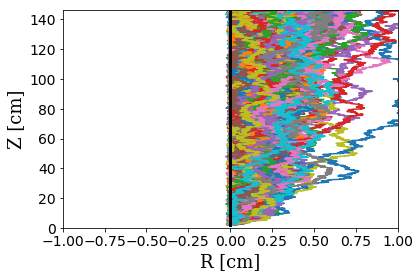

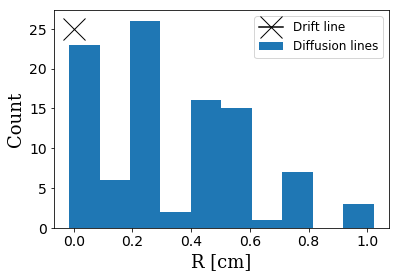

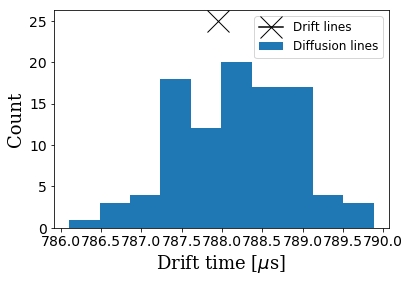

In [4]:
#
r=0
#pop=-3
r_cm_array_0, z_cm_array_0, mean_r_list_0, mean_z_list_0, r_array_0 = Get_arrays(r)

print "\n\t..Done!"

100
2462
len(mean_r_list) = 2457
len(mean_z_list) = 2457
len(mean_t_list) = 2457

	..Done!


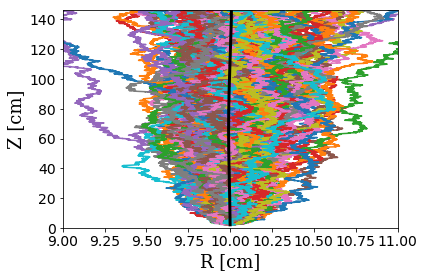

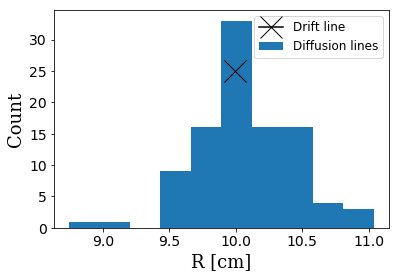

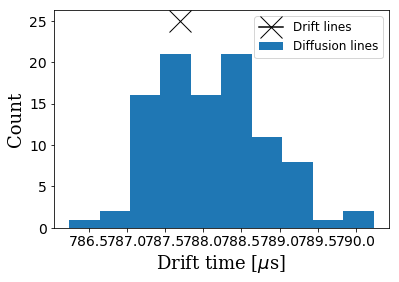

In [5]:
#
r=10
#pop=-3
r_cm_array_10, z_cm_array_10, mean_r_list_10, mean_z_list_10, r_array_10 = Get_arrays(r)

print "\n\t..Done!"

100
2462
len(mean_r_list) = 2457
len(mean_z_list) = 2457
len(mean_t_list) = 2457

	..Done!


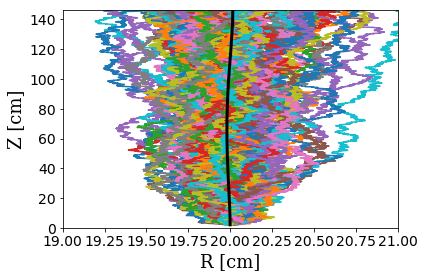

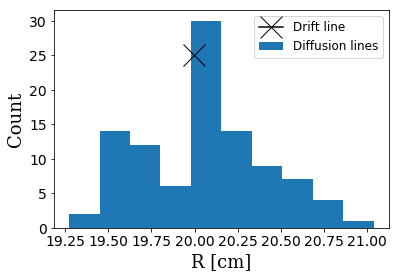

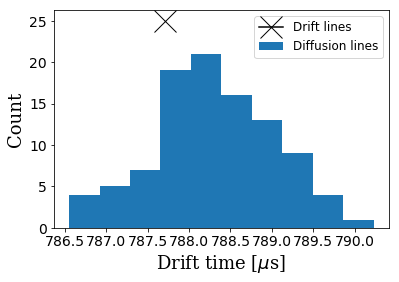

In [6]:
#
r=20
#pop=-3
r_cm_array_20, z_cm_array_20, mean_r_list_20, mean_z_list_20, r_array_20 = Get_arrays(r)

print "\n\t..Done!"

100
2462
len(mean_r_list) = 2457
len(mean_z_list) = 2457
len(mean_t_list) = 2457

	..Done!


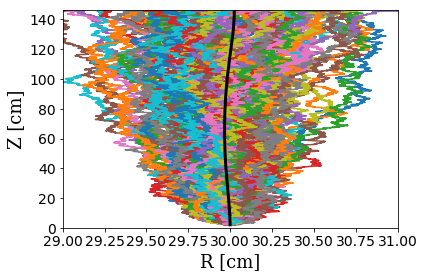

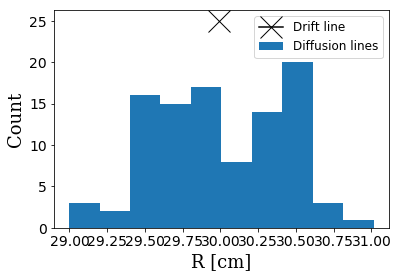

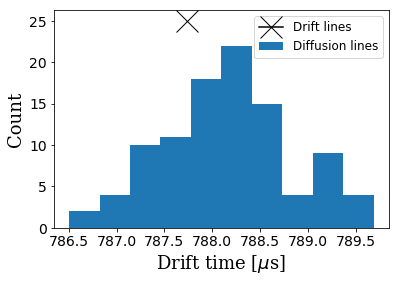

In [7]:
#
r=30
#pop=-3
r_cm_array_30, z_cm_array_30, mean_r_list_30, mean_z_list_30, r_array_30 = Get_arrays(r)

print "\n\t..Done!"

100
2461
len(mean_r_list) = 2456
len(mean_z_list) = 2456
len(mean_t_list) = 2456

	..Done!


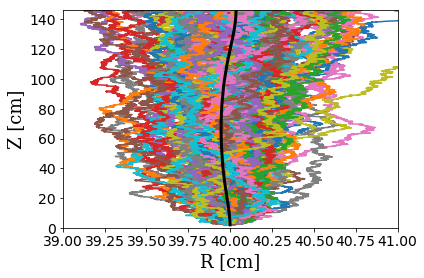

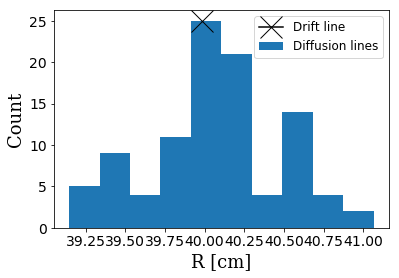

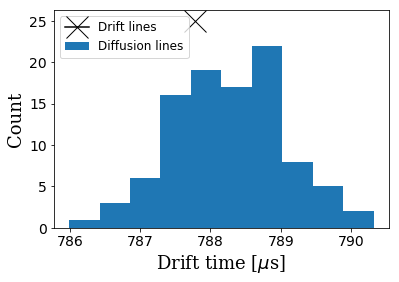

In [8]:
r=40
#pop=-3
r_cm_array_40, z_cm_array_40, mean_r_list_40, mean_z_list_40, r_array_40 = Get_arrays(r)

print "\n\t..Done!"

100
2462
len(mean_r_list) = 2457
len(mean_z_list) = 2457
len(mean_t_list) = 2457

	..Done!


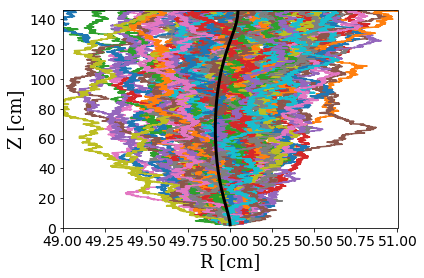

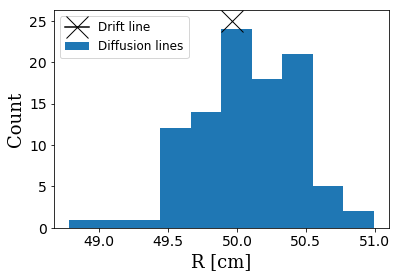

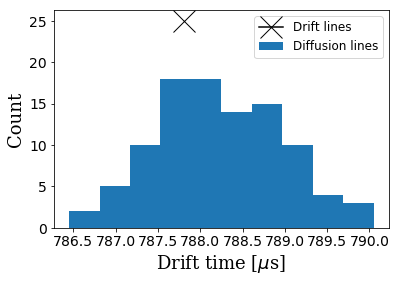

In [9]:
r=50
#pop=-3
r_cm_array_50, z_cm_array_50, mean_r_list_50, mean_z_list_50, r_array_50 = Get_arrays(r)

print "\n\t..Done!"

100
2462
len(mean_r_list) = 2457
len(mean_z_list) = 2457
len(mean_t_list) = 2457

	..Done!


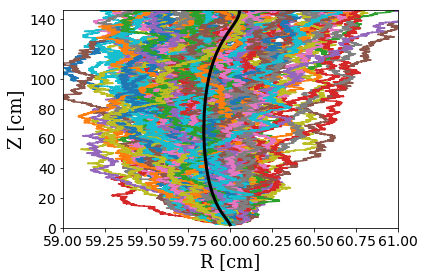

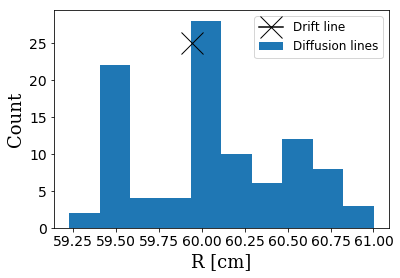

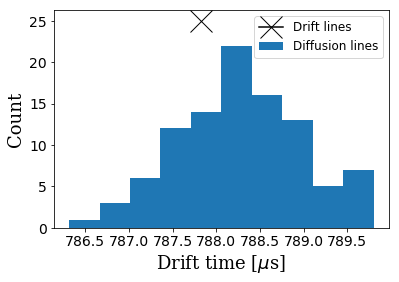

In [10]:
r=60
#pop=-3
r_cm_array_60, z_cm_array_60, mean_r_list_60, mean_z_list_60, r_array_60 = Get_arrays(r)

print "\n\t..Done!"

100
2460
len(mean_r_list) = 2455
len(mean_z_list) = 2455
len(mean_t_list) = 2455

	..Done!


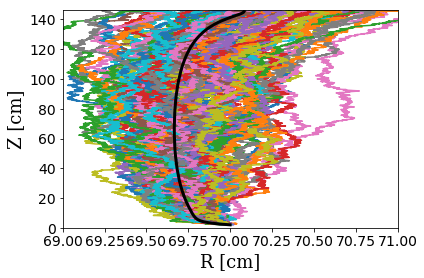

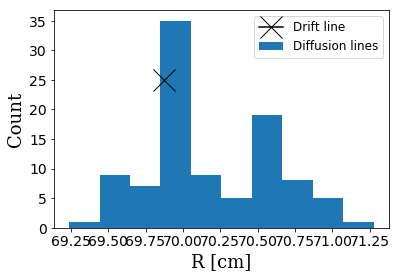

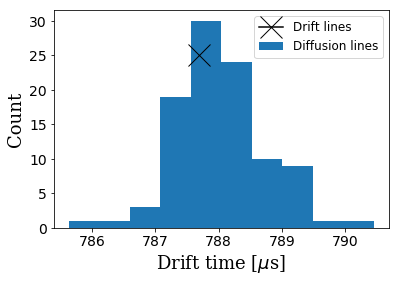

In [11]:
r=70
#pop=-3
r_cm_array_70, z_cm_array_70, mean_r_list_70, mean_z_list_70, r_array_70 = Get_arrays(r)

print "\n\t..Done!"

(0, 150)

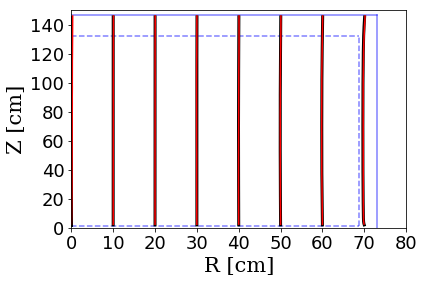

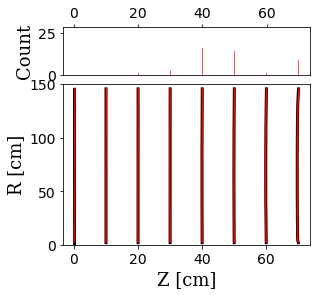

In [17]:
#pop=-2
size1=18
size2=21

figure(4)

r = linspace(0, 68.8, 2)
z_fid = linspace(132.1, 132.1, 2)
z = linspace(1.5, 132.1, 2)
r_fid = linspace(68.8, 68.8, 2)
z_top = linspace(146.55, 146.55, 2)
z2 = linspace(0, 146.55, 2)
r2 = linspace(0, 73.01, 2)
r_top = linspace(73.01, 73.01, 2)

plt.plot(r, z_fid, '--', c='blue', alpha=.5, label='Fiducial Boundary')
plt.plot(r_fid, z, '--', c='blue', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='blue', alpha=.5)

plt.plot(r2, z_top, '-', c='blue', alpha=.5, label='LXe Boundary')
plt.plot(r_top, z2, '-', c='blue', alpha=.5)


plt.plot(r_cm_array_0[:pop], z_cm_array_0[:pop], '-k', linewidth=3, label='Drift line')
plt.plot(mean_r_list_0, mean_z_list_0, '-r', label='Mean diffusion line')

plt.plot(r_cm_array_10[:pop], z_cm_array_10[:pop], '-k', linewidth=3)
plt.plot(mean_r_list_10, mean_z_list_10, '-r')

plt.plot(r_cm_array_20[:pop], z_cm_array_20[:pop], '-k', linewidth=3)
plt.plot(mean_r_list_20, mean_z_list_20, '-r')

plt.plot(r_cm_array_30[:pop], z_cm_array_30[:pop], '-k', linewidth=3)
plt.plot(mean_r_list_30, mean_z_list_30, '-r')

plt.plot(r_cm_array_40[:pop], z_cm_array_40[:pop], '-k', linewidth=3)
plt.plot(mean_r_list_40, mean_z_list_40, '-r')

plt.plot(r_cm_array_50[:pop], z_cm_array_50[:pop], '-k', linewidth=3)
plt.plot(mean_r_list_50, mean_z_list_50, '-r')

plt.plot(r_cm_array_60[:pop], z_cm_array_60[:pop], '-k', linewidth=3)
plt.plot(mean_r_list_60, mean_z_list_60, '-r')

plt.plot(r_cm_array_70[:pop], z_cm_array_70[:pop], '-k', linewidth=3)
plt.plot(mean_r_list_70, mean_z_list_70, '-r')

plt.xlabel('R [cm]',fontsize=size2,family='serif')
plt.ylabel('Z [cm]',fontsize=size2,family='serif')

plt.xticks(fontsize=size1)
plt.yticks(fontsize=size1)
#pylab.legend(loc='best', fontsize=12)

plt.ylim(0, 150)
plt.xlim(0,80)



fig = plt.figure()

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.plot(r_cm_array_0[:pop], z_cm_array_0[:pop], '-k', linewidth=3, label='Drift line')
ax_joint.plot(mean_r_list_0, mean_z_list_0, '-r', label='Mean diffusion line')

ax_joint.plot(r_cm_array_10[:pop], z_cm_array_10[:pop], '-k', linewidth=3)
ax_joint.plot(mean_r_list_10, mean_z_list_10, '-r')

ax_joint.plot(r_cm_array_20[:pop], z_cm_array_20[:pop], '-k', linewidth=3)
ax_joint.plot(mean_r_list_20, mean_z_list_20, '-r')

ax_joint.plot(r_cm_array_30[:pop], z_cm_array_30[:pop], '-k', linewidth=3)
ax_joint.plot(mean_r_list_30, mean_z_list_30, '-r')

ax_joint.plot(r_cm_array_40[:pop], z_cm_array_40[:pop], '-k', linewidth=3)
ax_joint.plot(mean_r_list_40, mean_z_list_40, '-r')

ax_joint.plot(r_cm_array_50[:pop], z_cm_array_50[:pop], '-k', linewidth=3)
ax_joint.plot(mean_r_list_50, mean_z_list_50, '-r')

ax_joint.plot(r_cm_array_60[:pop], z_cm_array_60[:pop], '-k', linewidth=3)
ax_joint.plot(mean_r_list_60, mean_z_list_60, '-r')

ax_joint.plot(r_cm_array_70[:pop], z_cm_array_70[:pop], '-k', linewidth=3)
ax_joint.plot(mean_r_list_70, mean_z_list_70, '-r')

"""
plt.hist(r_list,label='Diffusion lines')
plt.plot(r, 25, marker="x", markersize=22, label='Drift line')
"""
ax_marg_x.hist(r_array_0, color='red', alpha=.66)
ax_marg_x.hist(r_array_10, color='red', alpha=.66)
ax_marg_x.hist(r_array_20, color='red', alpha=.66)
ax_marg_x.hist(r_array_30, color='red', alpha=.66)
ax_marg_x.hist(r_array_40, color='red', alpha=.66)
ax_marg_x.hist(r_array_50, color='red', alpha=.66)
ax_marg_x.hist(r_array_60, color='red', alpha=.66)
ax_marg_x.hist(r_array_70, color='red', alpha=.66)


#ax_marg_x.plot(r, 25, marker="x", color='black', markersize=22, label='Drift line')

## Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)

## Set labels on joint
ax_joint.set_xlabel('Joint x label')
ax_joint.set_ylabel('Joint y label')

ax_joint.set_ylabel('R [cm]',fontsize=18,family='serif')
ax_joint.set_xlabel('Z [cm]',fontsize=18,family='serif')
ax_joint.tick_params(axis='both', which='major', labelsize=14)
ax_joint.tick_params(axis='both', which='major', labelsize=14)



## Set labels on marginals
ax_marg_x.set_ylabel('Count',fontsize=18,family='serif')

ax_marg_x.tick_params(axis='both', which='major', labelsize=14)
ax_marg_x.xaxis.tick_top()


##ax_marg_x.set_xticks(fontsize=14)
#ax_joint.set_xlim(25,55)
#ax_marg_x.set_xlim(25,55)
ax_joint.set_ylim(0, 150)



In [13]:

"""

screen -S temp_screen
cd LZ_EDM_200501/
source DiffusionAnalysis_0505_bash.sh 10 100 10

"""


'\n\nscreen -S temp_screen\ncd LZ_EDM_200501/\nsource DiffusionAnalysis_0505_bash.sh 10 100 10\n\n'

In [14]:
print 334606 - 323442
print 215247 - 205554
print 11334 - 10780

11164
9693
554


In [15]:
print 334606 - 323471

11135


In [16]:


"""
mkdir /data/rossiter/lz/EDM_DiffusionAnalysis_2005/r70/
mv r70/* /data/rossiter/lz/EDM_DiffusionAnalysis_2005/r70/.

mkdir /data/rossiter/lz/EDM_DiffusionAnalysis_2005/r60/
mv r60/* /data/rossiter/lz/EDM_DiffusionAnalysis_2005/r60/.



"""

'\nmkdir /data/rossiter/lz/EDM_DiffusionAnalysis_2005/r70/\nmv r70/* /data/rossiter/lz/EDM_DiffusionAnalysis_2005/r70/.\n\nmkdir /data/rossiter/lz/EDM_DiffusionAnalysis_2005/r60/\nmv r60/* /data/rossiter/lz/EDM_DiffusionAnalysis_2005/r60/.\n\n\n\n'